In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Fetch data

In [2]:
def get_data(subject=1, trial=1):
    with open(f"data/{subject}-{trial}.json") as meta_file, \
         open(f"data/{subject}-{trial}.csv") as data_file:
        meta = json.load(meta_file)
        data = pd.read_csv(data_file, sep=',', header=0)
        meta['data'] = data
        return meta

In [3]:
trial = get_data(subject=6, trial=1)

## Look at the data

In [4]:
trial.keys()

dict_keys(['Subject', 'Trial', 'Code', 'Age', 'Gender', 'Height', 'Weight', 'BMI', 'Laterality', 'Sensor', 'WalkedDistance', 'WalkingSpeed', 'PathologyGroup', 'IsControl', 'LeftFootActivity', 'RightFootActivity', 'data'])

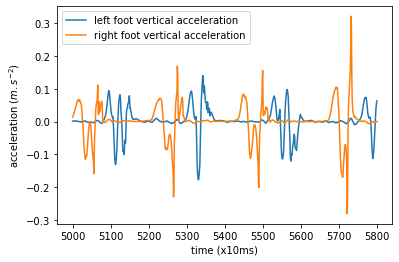

In [5]:
START_IDX=5000
END_IDX=5800

fig, ax = plt.subplots()
ax.plot(trial['data']['LAV'][START_IDX:END_IDX],
        label='left foot vertical acceleration')
ax.plot(trial['data']['RAV'][START_IDX:END_IDX],
        label='right foot vertical acceleration')
ax.set_xlabel('time (x10ms)')
ax.set_ylabel('acceleration ($m.s^{-2}$)')
ax.legend()

## Reshape foot activity metadata

In [6]:
left_foot_heel_off = np.array([d[0] for d in trial['LeftFootActivity']])
left_foot_toe_strike = np.array([d[1] for d in trial['LeftFootActivity']])

In [7]:
left_foot_heel_off[:5]

array([ 944, 1230, 1491, 1788, 2060])

In [8]:
left_foot_toe_strike[:5]

array([1025, 1295, 1565, 1858, 2124])

In [9]:
lf_hoff = [0.3 if i in left_foot_heel_off else 0 for i in range(len(trial['data']))]
lf_ts = [0.3 if i in left_foot_toe_strike else 0 for i in range(len(trial['data']))]

# Note: the above lines are quite ugly, there's without a doubt a more elegant numpy solution, but
# struggling with data processing is part of the process :-)

## Look at foot activity

In [10]:
# Approximate number of steps (left foot heel strikes)
len(left_foot_heel_off)

72

In [15]:
# Average duration of a "step" (time between two heel off events)
left_steps = left_foot_heel_off[1:] - left_foot_heel_off[:-1]
avg_step_duration = np.mean(left_steps)/100
avg_step_duration

2.3902816901408452

## Overlay foot activity

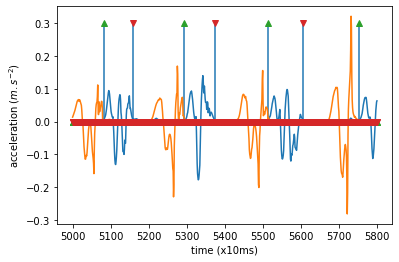

In [12]:
fig2, ax2 = plt.subplots()
ax2.plot(trial['data']['LAV'][START_IDX:END_IDX],
        label='left foot vertical acceleration')
ax2.plot(trial['data']['RAV'][START_IDX:END_IDX],
        label='right foot vertical acceleration')
ax2.stem(range(START_IDX, END_IDX), lf_hoff[START_IDX:END_IDX], markerfmt="^")
ax2.stem(range(START_IDX, END_IDX), lf_ts[START_IDX:END_IDX], markerfmt="v")
ax2.set_xlabel('time (x10ms)')
ax2.set_ylabel('acceleration ($m.s^{-2}$)')
ax.legend()